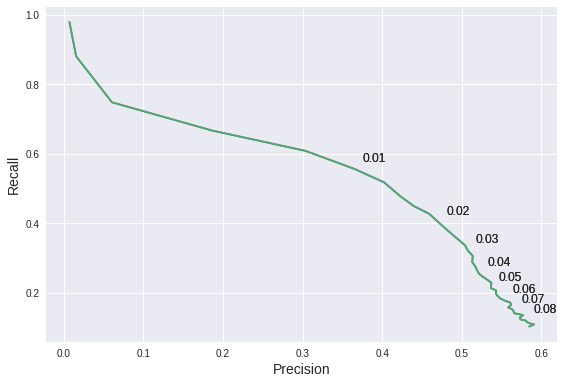

ValueError: max() arg is an empty sequence

In [7]:
#!/usr/bin/env python

import os
import sys
from IPython import embed

import matplotlib
#matplotlib.use('GTKAgg')

import seaborn as sns
import matplotlib.pyplot as plt

import scipy.io as sio
import numpy as np

GROUND_TRUTH_PATH = os.path.expanduser(
    '~/code/loop_closures/data/NewCollegeGroundTruth.mat')

WORK_FOLDER = os.path.expanduser(
    '~/code/loop_closures/out/')

if __name__ == "__main__":
    gt_data = sio.loadmat(GROUND_TRUTH_PATH)['truth'][::2, ::2]

    bow_data = np.loadtxt(os.path.join(
        WORK_FOLDER, 'confusion_matrix.txt'))
    # Take the lower triangle only
    bow_data = np.tril(bow_data, -1)

    prec_recall_curve = []

    for thresh in np.arange(0, 0.09, 0.002):
        # precision: fraction of retrieved instances that are relevant
        # recall: fraction of relevant instances that are retrieved
        true_positives = (bow_data > thresh) & (gt_data == 1)
        all_positives = (bow_data > thresh)

        try:
            precision = float(np.sum(true_positives)) / np.sum(all_positives)
            recall = float(np.sum(true_positives)) / np.sum(gt_data == 1)

            prec_recall_curve.append([thresh, precision, recall])
        except:
            break

    prec_recall_curve = np.array(prec_recall_curve)

    plt.plot(prec_recall_curve[:, 1], prec_recall_curve[:, 2])

    for thresh, prec, rec in prec_recall_curve[5::5]:
        plt.annotate(
            str(thresh),
            xy=(prec, rec),
            xytext=(8, 8),
            textcoords='offset points')

    plt.xlabel('Precision', fontsize=14)
    plt.ylabel('Recall', fontsize=14)

    plt.show()
    plt.tight_layout()
    plt.savefig(os.path.join(
        WORK_FOLDER, 'prec_recall_curve.png'),
        bbox_inches='tight')